<font size=5>
    Second-order data exploration: PCA
</font>

<hr style="border: solid rgb(0,0,0) 0.0px; background-color: rgb(0,0,0);height: 2.0px;"/>
<font size=4>
    Summary: 
</font>
        
A quick look at the filled numerical columns with PCA; this is the initial investigation without any data cleaning.

# Summary
A quiick look at the filled numerical columns with PCA; this is the initial investigation without any data cleaning.

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 20)]
random.shuffle(colors)

In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os`x
for dirname, _, filenames in os.walk(BASE_PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../datasets/sberbank-russian-housing-market/sample_submission.csv
../../datasets/sberbank-russian-housing-market/macro.csv
../../datasets/sberbank-russian-housing-market/test.csv
../../datasets/sberbank-russian-housing-market/data_dictionary.txt
../../datasets/sberbank-russian-housing-market/train.csv
../../datasets/sberbank-russian-housing-market/sberbank-russian-housing-market.zip
../../datasets/sberbank-russian-housing-market/__MACOSX/._test.csv
../../datasets/sberbank-russian-housing-market/__MACOSX/._train.csv


## Load the data

In [6]:
BASE_PATH = os.path.abspath('../../../../data/')

In [8]:
df = pd.read_csv(BASE_PATH + '/train.csv', \
                 infer_datetime_format=True, parse_dates=['timestamp'])

In [9]:
df.shape

(30471, 292)

## PCA

### First, get the numberic data 

(ignore the categorical)

In [13]:
missing = [(c, df[c].isna().mean()*100) for c in df]
missing = pd.DataFrame(missing, columns=["column_name", "percent_missing"])
missing = missing[missing.percent_missing > 0]

In [14]:
df.shape, missing.shape

((30471, 292), (51, 2))

In [15]:
missing_col_names = missing.column_name.values.tolist() + ['price_doc']
all_cols = df.columns.tolist()

In [16]:
all_full_cols = [item for item in all_cols if item not in missing_col_names]

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

X = df.filter(all_full_cols, axis=1).select_dtypes(include=numerics)

In [18]:
X.shape

(30471, 224)

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components=224)

X_pca = pca.fit_transform(X)
sing_vals = pca.singular_values_

In [95]:
from matplotlib.ticker import MultipleLocator, LogLocator

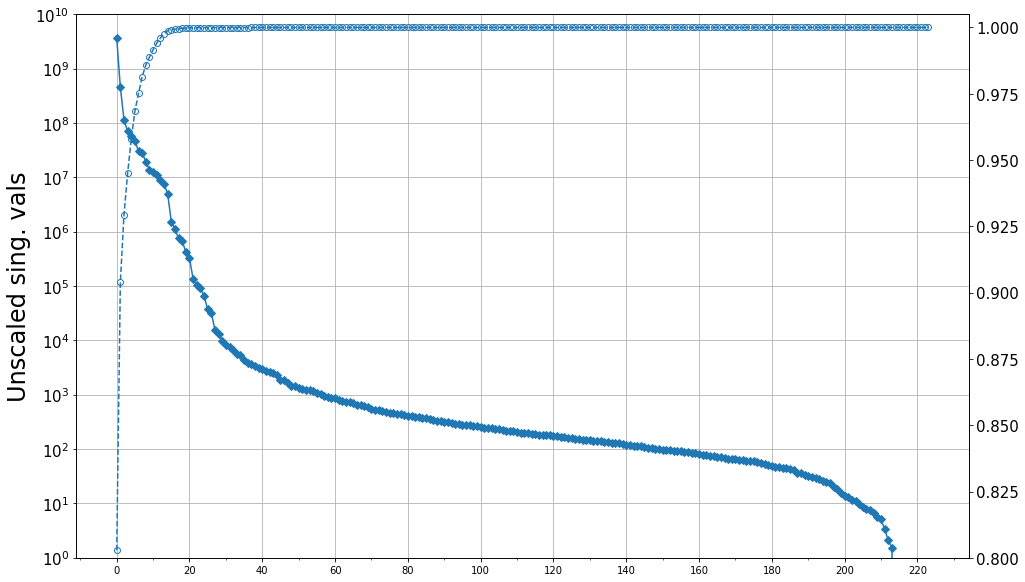

In [112]:
fig, ax = plt.subplots(1,1,figsize=(16,10))

ax.plot(sing_vals, marker=markers[0])
ax.set_yscale('log')    
ax.set_ylabel('Unscaled sing. vals', fontsize=24)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylim(1,1e10)

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(LogLocator(numticks=11))


axt = ax.twinx()
axt.plot(sing_vals.cumsum()/sing_vals.sum(), 'o--', markerfacecolor="None")
axt.tick_params(axis='y', labelsize=15)
axt.set_ylim(0,1)
axt.set_ylim(0.8,1.005)
ax.grid();

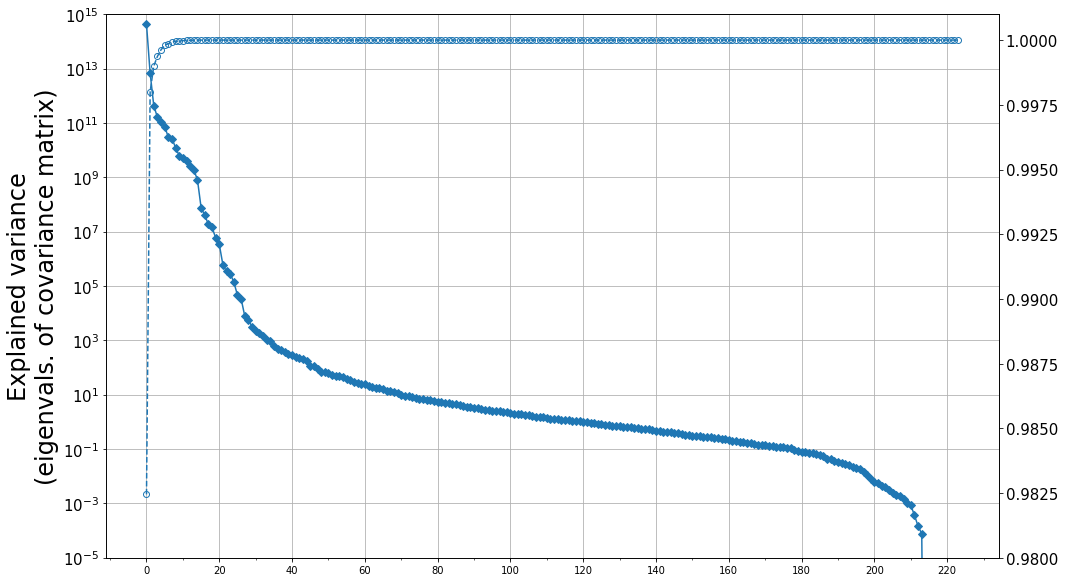

In [109]:
fig, ax = plt.subplots(1,1,figsize=(16,10))

ax.plot(range(224),pca.explained_variance_, marker=markers[0])
ax.set_yscale('log')    
ax.set_ylabel('Explained variance\n(eigenvals. of covariance matrix)', fontsize=24)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylim(1e-5,1e15)

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(LogLocator(subs='all', numticks=10))

axt = ax.twinx()
axt.plot(pca.explained_variance_ratio_.cumsum(), 'o--', markerfacecolor="None")
axt.tick_params(axis='y', labelsize=15)
axt.set_ylim(0,1)
axt.set_ylim(0.98,1.0+1e-3)
ax.grid();

In [76]:
1-np.sum(pca.explained_variance_ratio_[:50])

1.7997825452198413e-12